## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  12.206707  1751.498089  0.820624   8.013616  1437.256518
1  68.245449   697.104736  0.849733   4.644987   596.138111
2  97.269813   345.638827  0.858403   3.430038   312.310191
3  16.403009   313.098116  0.198995   9.837417    64.493005
4  85.059120   575.399505  0.311018  10.439955   198.011249


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0190875	total: 57.7ms	remaining: 57.7s
1:	learn: 1.0074195	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9949459	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9819828	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9678394	total: 59.8ms	remaining: 11.9s
5:	learn: 0.9562732	total: 60.3ms	remaining: 9.99s
6:	learn: 0.9452888	total: 60.7ms	remaining: 8.61s
7:	learn: 0.9326938	total: 61.1ms	remaining: 7.58s
8:	learn: 0.9201909	total: 61.5ms	remaining: 6.78s
9:	learn: 0.9063433	total: 62.1ms	remaining: 6.14s
10:	learn: 0.8948172	total: 62.5ms	remaining: 5.61s
11:	learn: 0.8816945	total: 62.9ms	remaining: 5.18s
12:	learn: 0.8709446	total: 63.4ms	remaining: 4.81s
13:	learn: 0.8591195	total: 63.8ms	remaining: 4.49s
14:	learn: 0.8462850	total: 64.2ms	remaining: 4.22s
15:	learn: 0.8370161	total: 64.7ms	remaining: 3.98s
16:	learn: 0.8247947	total: 65.2ms	remaining: 3.77s
17:	learn: 0.8158078	total: 65.9ms	remaining: 3.59s
18:	learn: 0.8084915	total: 66.3ms	remaining

105:	learn: 0.2979905	total: 104ms	remaining: 876ms
106:	learn: 0.2951924	total: 104ms	remaining: 871ms
107:	learn: 0.2921488	total: 105ms	remaining: 866ms
108:	learn: 0.2888520	total: 105ms	remaining: 861ms
109:	learn: 0.2863540	total: 106ms	remaining: 854ms
110:	learn: 0.2828511	total: 106ms	remaining: 849ms
111:	learn: 0.2795615	total: 106ms	remaining: 843ms
112:	learn: 0.2769864	total: 107ms	remaining: 837ms
113:	learn: 0.2745211	total: 107ms	remaining: 832ms
114:	learn: 0.2723669	total: 107ms	remaining: 827ms
115:	learn: 0.2700872	total: 108ms	remaining: 824ms
116:	learn: 0.2679921	total: 108ms	remaining: 818ms
117:	learn: 0.2653544	total: 109ms	remaining: 814ms
118:	learn: 0.2628114	total: 109ms	remaining: 809ms
119:	learn: 0.2603885	total: 110ms	remaining: 804ms
120:	learn: 0.2580142	total: 110ms	remaining: 800ms
121:	learn: 0.2553610	total: 111ms	remaining: 796ms
122:	learn: 0.2525763	total: 111ms	remaining: 792ms
123:	learn: 0.2499181	total: 112ms	remaining: 788ms
124:	learn: 

298:	learn: 0.0717616	total: 185ms	remaining: 433ms
299:	learn: 0.0715487	total: 185ms	remaining: 432ms
300:	learn: 0.0711728	total: 185ms	remaining: 430ms
301:	learn: 0.0708018	total: 186ms	remaining: 429ms
302:	learn: 0.0705822	total: 186ms	remaining: 428ms
303:	learn: 0.0702559	total: 186ms	remaining: 427ms
304:	learn: 0.0699060	total: 187ms	remaining: 425ms
305:	learn: 0.0696107	total: 187ms	remaining: 425ms
306:	learn: 0.0692960	total: 188ms	remaining: 424ms
307:	learn: 0.0689301	total: 188ms	remaining: 423ms
308:	learn: 0.0687491	total: 188ms	remaining: 421ms
309:	learn: 0.0684868	total: 189ms	remaining: 421ms
310:	learn: 0.0681641	total: 189ms	remaining: 419ms
311:	learn: 0.0679694	total: 190ms	remaining: 418ms
312:	learn: 0.0676138	total: 190ms	remaining: 417ms
313:	learn: 0.0674104	total: 191ms	remaining: 416ms
314:	learn: 0.0670997	total: 191ms	remaining: 415ms
315:	learn: 0.0666448	total: 191ms	remaining: 414ms
316:	learn: 0.0663184	total: 191ms	remaining: 412ms
317:	learn: 

543:	learn: 0.0321069	total: 283ms	remaining: 237ms
544:	learn: 0.0319824	total: 284ms	remaining: 237ms
545:	learn: 0.0317604	total: 284ms	remaining: 236ms
546:	learn: 0.0315421	total: 284ms	remaining: 235ms
547:	learn: 0.0312985	total: 285ms	remaining: 235ms
548:	learn: 0.0311489	total: 285ms	remaining: 234ms
549:	learn: 0.0310320	total: 286ms	remaining: 234ms
550:	learn: 0.0308208	total: 287ms	remaining: 234ms
551:	learn: 0.0306132	total: 287ms	remaining: 233ms
552:	learn: 0.0303862	total: 287ms	remaining: 232ms
553:	learn: 0.0301531	total: 288ms	remaining: 231ms
554:	learn: 0.0299864	total: 288ms	remaining: 231ms
555:	learn: 0.0298233	total: 289ms	remaining: 231ms
556:	learn: 0.0295959	total: 290ms	remaining: 231ms
557:	learn: 0.0294890	total: 291ms	remaining: 230ms
558:	learn: 0.0293311	total: 292ms	remaining: 230ms
559:	learn: 0.0291362	total: 292ms	remaining: 229ms
560:	learn: 0.0289445	total: 292ms	remaining: 229ms
561:	learn: 0.0287561	total: 293ms	remaining: 228ms
562:	learn: 

726:	learn: 0.0129757	total: 364ms	remaining: 137ms
727:	learn: 0.0129288	total: 364ms	remaining: 136ms
728:	learn: 0.0128507	total: 365ms	remaining: 136ms
729:	learn: 0.0128097	total: 365ms	remaining: 135ms
730:	learn: 0.0127512	total: 365ms	remaining: 134ms
731:	learn: 0.0126755	total: 366ms	remaining: 134ms
732:	learn: 0.0126360	total: 366ms	remaining: 133ms
733:	learn: 0.0125610	total: 366ms	remaining: 133ms
734:	learn: 0.0125225	total: 366ms	remaining: 132ms
735:	learn: 0.0124663	total: 367ms	remaining: 132ms
736:	learn: 0.0124143	total: 367ms	remaining: 131ms
737:	learn: 0.0123770	total: 367ms	remaining: 130ms
738:	learn: 0.0123053	total: 367ms	remaining: 130ms
739:	learn: 0.0122514	total: 368ms	remaining: 129ms
740:	learn: 0.0121855	total: 368ms	remaining: 129ms
741:	learn: 0.0121318	total: 368ms	remaining: 128ms
742:	learn: 0.0120959	total: 369ms	remaining: 127ms
743:	learn: 0.0120272	total: 369ms	remaining: 127ms
744:	learn: 0.0119758	total: 369ms	remaining: 126ms
745:	learn: 

920:	learn: 0.0066519	total: 445ms	remaining: 38.2ms
921:	learn: 0.0066363	total: 446ms	remaining: 37.7ms
922:	learn: 0.0066217	total: 447ms	remaining: 37.3ms
923:	learn: 0.0065915	total: 447ms	remaining: 36.8ms
924:	learn: 0.0065762	total: 447ms	remaining: 36.3ms
925:	learn: 0.0065465	total: 448ms	remaining: 35.8ms
926:	learn: 0.0065303	total: 448ms	remaining: 35.3ms
927:	learn: 0.0065112	total: 449ms	remaining: 34.8ms
928:	learn: 0.0064972	total: 449ms	remaining: 34.3ms
929:	learn: 0.0064682	total: 450ms	remaining: 33.8ms
930:	learn: 0.0064523	total: 450ms	remaining: 33.4ms
931:	learn: 0.0064386	total: 451ms	remaining: 32.9ms
932:	learn: 0.0064102	total: 451ms	remaining: 32.4ms
933:	learn: 0.0063918	total: 452ms	remaining: 31.9ms
934:	learn: 0.0063696	total: 452ms	remaining: 31.4ms
935:	learn: 0.0063419	total: 453ms	remaining: 31ms
936:	learn: 0.0063252	total: 453ms	remaining: 30.5ms
937:	learn: 0.0062980	total: 454ms	remaining: 30ms
938:	learn: 0.0062833	total: 454ms	remaining: 29.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

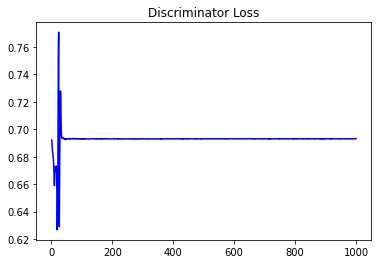

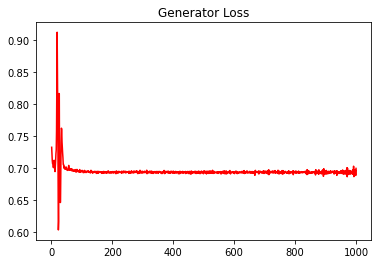

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.012934711439345933


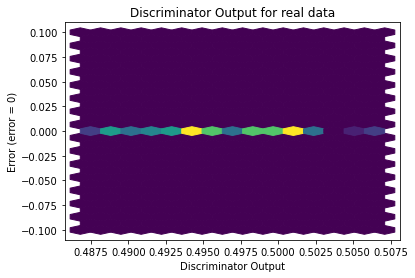

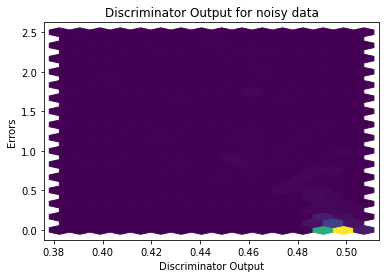

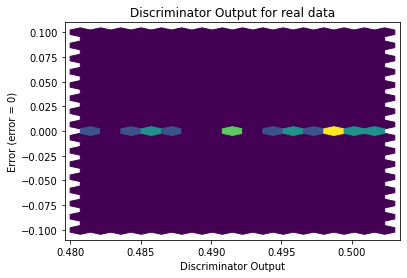

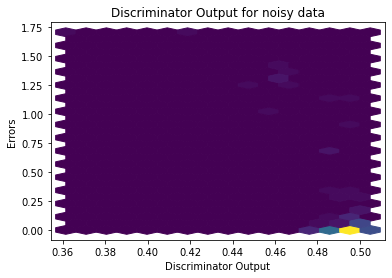

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


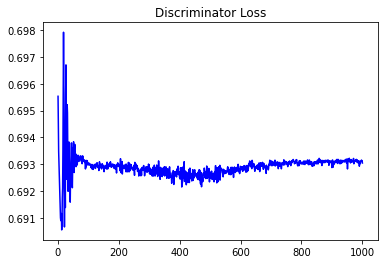

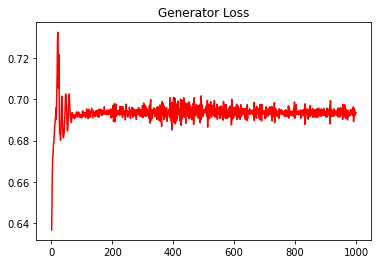

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.006710951373349148


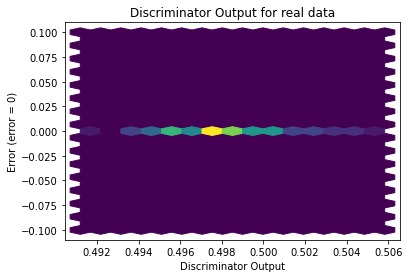

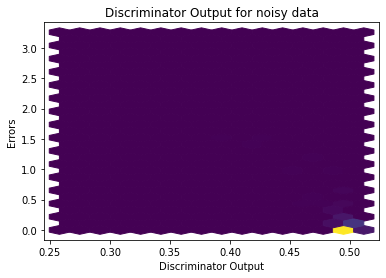

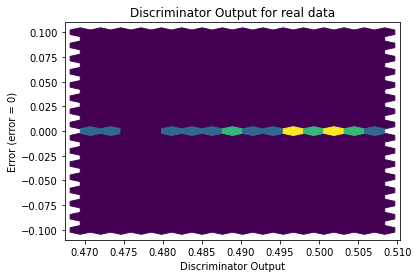

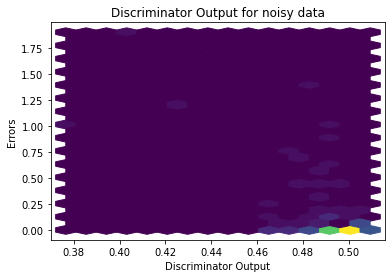

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1988]], requires_grad=True)
